# **stcok price prediction** 

---



##importing dependencies




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## load dataset

In [2]:
Tesla=pd.read_csv("Tesla.csv - Tesla.csv.csv", index_col="Date", parse_dates=True)

In [3]:
Tesla.head(20)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
2010-07-09,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
2010-07-12,17.950001,18.070000,17.000000,17.049999,2202500,17.049999


## analyzing data

In [4]:
Tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [5]:
Tesla.info()              #only volumn column is of int data type 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


In [6]:
Tesla['Volume']=Tesla['Volume'].astype(float)

In [7]:
Tesla.info()           #column of adj close is having same values as close so it is not of much use

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   float64
 5   Adj Close  1692 non-null   float64
dtypes: float64(6)
memory usage: 92.5 KB


In [8]:
Tesla.shape

(1692, 6)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372b1b3eb8>,
      dtype=object)

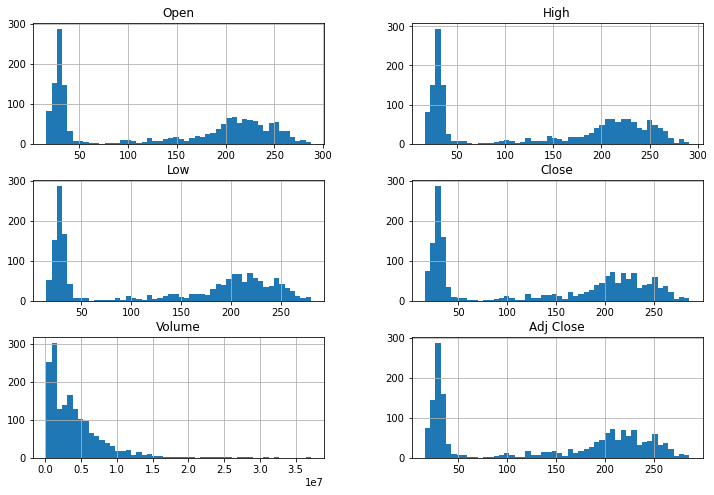

In [9]:
Tesla.hist(bins=50, figsize=(12,8))

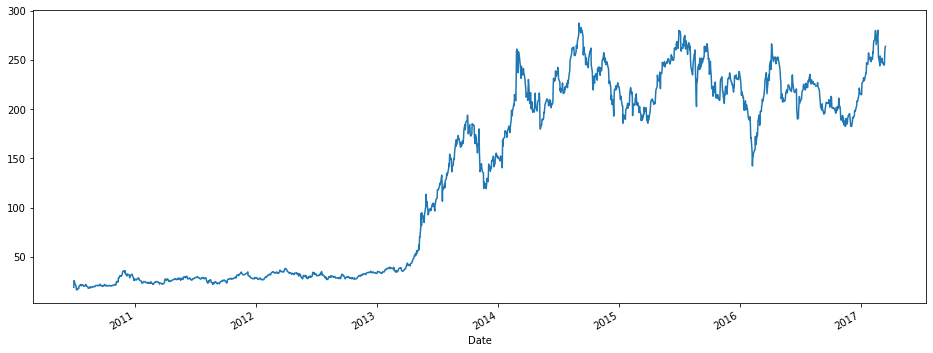

In [10]:
Tesla['Open'].plot(figsize=(16,6))

In [11]:
Tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [12]:
corr_matrix=Tesla.corr()
corr_matrix['Close'].sort_values(ascending=False)              #this shows that volume fearure has least effect on the value of close price

Adj Close    1.000000
Close        1.000000
High         0.999691
Low          0.999656
Open         0.999233
Volume       0.406907
Name: Close, dtype: float64

In [13]:
Tesla.rolling(7).mean().head(20)                            #used to get average of last 7 days

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08,20.761429,22.655714,18.028571,19.750000,1.011600e+07,19.750000
2010-07-09,20.558571,21.641428,17.887142,18.822857,8.013757e+06,18.822857
2010-07-12,19.438571,19.877143,16.987143,17.854286,5.873100e+06,17.854286


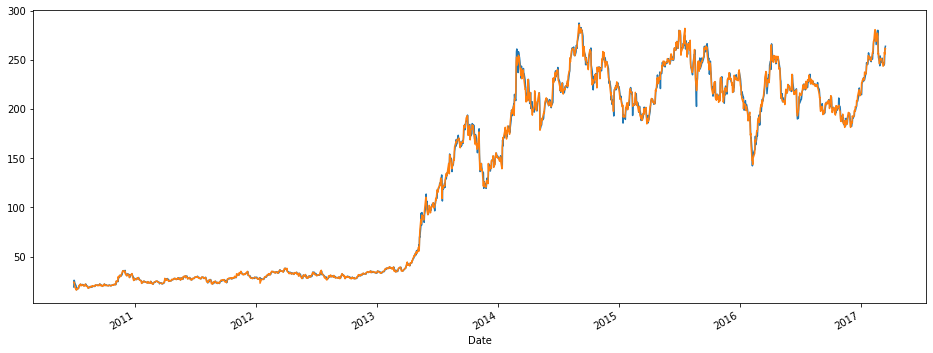

In [14]:
Tesla['Open'].plot(figsize=(16,6))
Tesla['Close'].plot()                           #plotting close price with open price

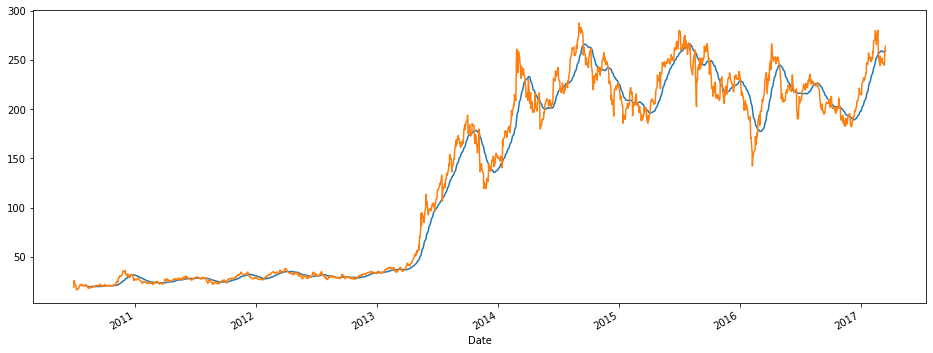

In [15]:
Tesla.rolling(window=30).mean()['Close'].plot(figsize=(16,6))
Tesla['Open'].plot()                                  #plotting average of last 30 days of close to actual price of open

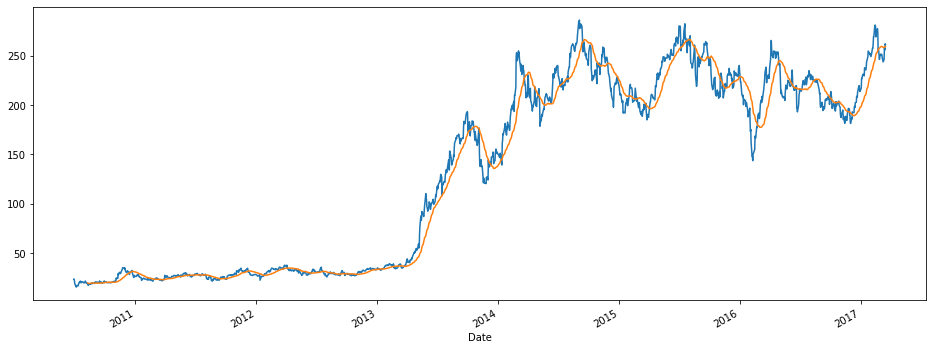

In [16]:
Tesla['Close'].plot(figsize=(16,6))
Tesla.rolling(window=30).mean()['Close'].plot()                  #plotting actual closing price with average of last 30 days of close price

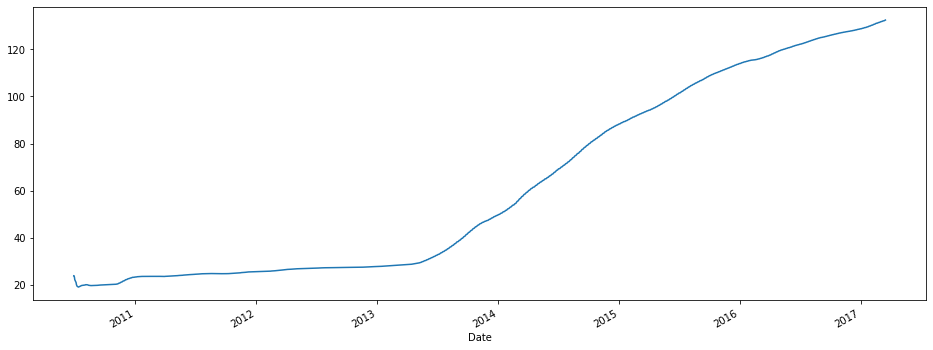

In [17]:
Tesla['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

##splitting data - train set and test set

In [18]:
X = Tesla.drop('Close',axis=1)
y = Tesla['Close'].copy()

In [19]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=4)

In [20]:
print(f"rows in train set {len(X_train)}\n rows in test set {len(y_test)}\n")

rows in train set 1353
 rows in test set 339



##model designing

In [21]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [22]:
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#scaler=MinMaxScaler(feature_range=(-1,1))
#train_sc = scaler.fit_transform(X.values.reshape(-1,1))
#test_sc = scaler.transform(Y.values.reshape(-1,1))
#train_sc

##evaluating the model

In [24]:
y_test=pd.DataFrame(y_test)
y_test.head()

,0
0,214.309998
1,34.480000
2,216.610001
3,226.029999
4,24.120001


In [25]:
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head()


,0
0,214.309998
1,34.480000
2,216.610001
3,226.029999
4,24.120001


In [26]:
mse=mean_squared_error(y_test,y_pred)
print("mean squared error",mse)
print('Coefficient of determination:', r2_score(y_test, y_pred))

mean squared error 2.6100183961061475e-25
Coefficient of determination: 1.0


linear :-

  mean squared error 1.6083798487286338

  Coefficient of determination: 0.9998231613365195

decision tree:-

  mean squared error 5.081394152651037

  Coefficient of determination: 0.9994413092458958

randomforest regressor:-

  mean squared error 3.154977022278141
  
  Coefficient of determination: 0.9996531155744258  